# End-to-End Customer Sentiment Analysis and Recommendation System

# Load and Explore the Data

# Project Overview
This project focuses on analyzing customer reviews to predict their sentiment and recommend products based on their sentiments and preferences. By processing the review data, extracting meaningful insights, and utilizing machine learning models, the system provides automated sentiment classification and personalized product recommendations. This end-to-end solution improves customer experience by understanding their opinions and suggesting relevant products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv('Flipkart_Reviews - Electronics.csv')
df

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114
...,...,...,...,...,...,...,...,...,...
9369,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,4,Good quality product,this head phnes give good base in pluged ears ...,Bhimavaram,"Apr, 2018",0,0
9370,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,5,Awesome,This so far is one of the best headphones I've...,Ettimadai,"Apr, 2018",0,0
9371,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,4,Really Nice,I am a BASS LOVER and all others like me read ...,Guntur District,"Apr, 2018",0,0
9372,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,5,Super!,After use of one month........ It is an excell...,Kothamangalam,"Apr, 2018",0,0


In [3]:
# Display basic info and check for null values
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     9374 non-null   object
 1   product_title  9374 non-null   object
 2   rating         9374 non-null   int64 
 3   summary        9374 non-null   object
 4   review         9374 non-null   object
 5   location       8081 non-null   object
 6   date           9374 non-null   object
 7   upvotes        9374 non-null   int64 
 8   downvotes      9374 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 659.2+ KB
None
            rating      upvotes    downvotes
count  9374.000000  9374.000000  9374.000000
mean      4.094623     8.102731     1.911457
std       1.345756   102.296230    15.389562
min       1.000000     0.000000     0.000000
25%       4.000000     0.000000     0.000000
50%       5.000000     0.000000     0.000000
75%       5.000000     1.000000     0.000000
max 

# Data Cleaning and Preprocessing

In [4]:
# Filling Random Areas in Location Column.
random_locations = ['Shirala', 'Visakhapatnam', 'Jaora', 'New Delhi', 'Bhimavaram', 
                    'Ettimadai', 'Guntur District', 'Kothamangalam', 'Rampur']
df['location'] = df['location'].apply(
    lambda x: np.random.choice(random_locations) if pd.isnull(x) else x)

In [5]:
# Verify if all null values are filled
print(df['location'].isnull().sum())

0


In [6]:
# Drop duplicates
df = df.drop_duplicates()

# Sentiment Analysis
Define Sentiments
Create a new column Sentiment:
Positive (Rating > 3)
Neutral (Rating = 3)
Negative (Rating < 3)

In [7]:
def assign_sentiment(rating):
    if rating > 3:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"
df = df.copy()  # Ensure you're working with a full copy of the DataFrame

# Use .loc to assign values
df.loc[:, 'Sentiment'] = df['rating'].apply(assign_sentiment)

# Dataset Distribution
Visualize the distribution of sentiments in the dataset:

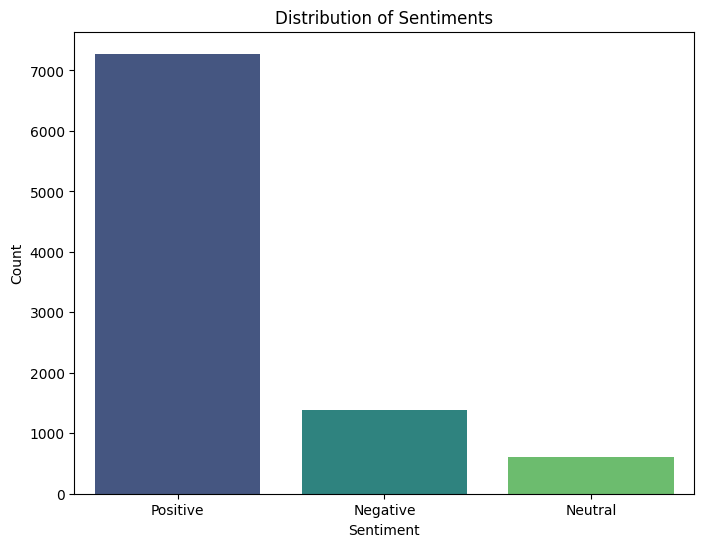

In [8]:
# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Train-Test Split
Split the data into training and testing sets:

In [9]:
X = df['review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction
Use TF-IDF Vectorization to convert text into numerical form:

In [10]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model Training
Train a sentiment classification model (e.g., Logistic Regression):

In [11]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

# Evaluate Model
Use confusion matrix and classification report to evaluate the model:

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict sentiments on the test set
y_pred = model.predict(X_test_tfidf)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the model:", accuracy)

Confusion Matrix:
[[ 195    6   65]
 [  24    1   92]
 [  20    4 1447]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.73      0.77       266
     Neutral       0.09      0.01      0.02       117
    Positive       0.90      0.98      0.94      1471

    accuracy                           0.89      1854
   macro avg       0.60      0.58      0.58      1854
weighted avg       0.84      0.89      0.86      1854


Accuracy of the model: 0.8861920172599784


#  Model Performance Metrics
Confusion Matrix Heatmap

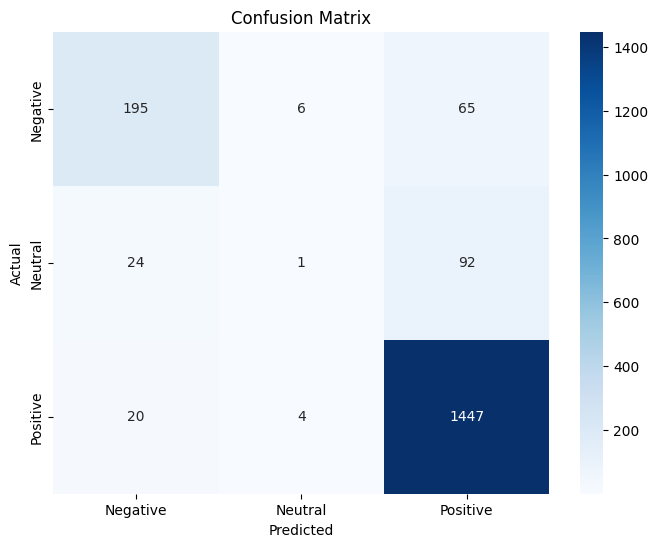

In [13]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_labels = ['Negative', 'Neutral', 'Positive']

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Word Cloud for Reviews
Create word clouds for positive, negative, and neutral reviews:

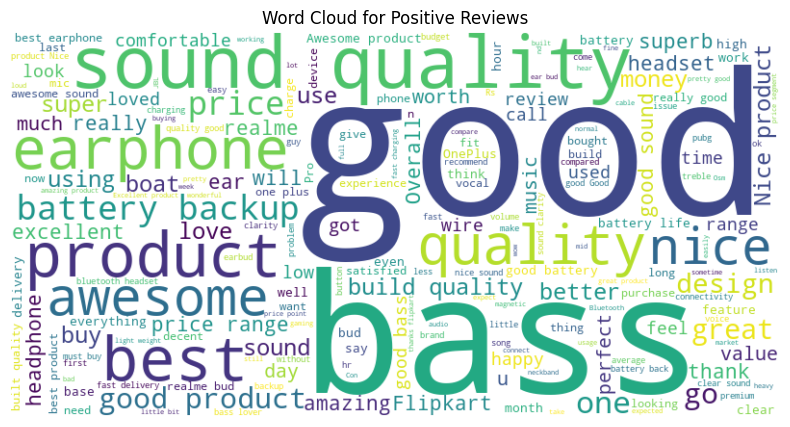

In [14]:
from wordcloud import WordCloud
# Generate word clouds for each sentiment
for sentiment in ['Positive']:
    text = ' '.join(df[df['Sentiment'] == sentiment]['review'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Review Length Analysis
Analyze the length of reviews for each sentiment:

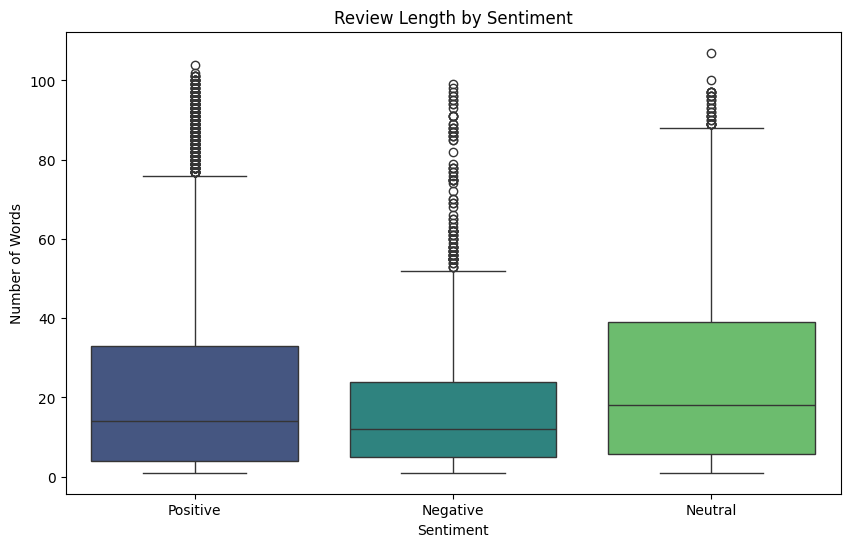

In [15]:
# Add a column for review length
df = df.copy()  # Create an independent copy of the DataFrame

# Add a column for review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

df.loc[:, 'review_length'] = df['review'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Boxplot for review length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='review_length', hue='Sentiment', palette='viridis', dodge=False, legend=False)
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()

#  Feature Importance 
If using a Logistic Regression model, visualize the most important words contributing to the predictions:

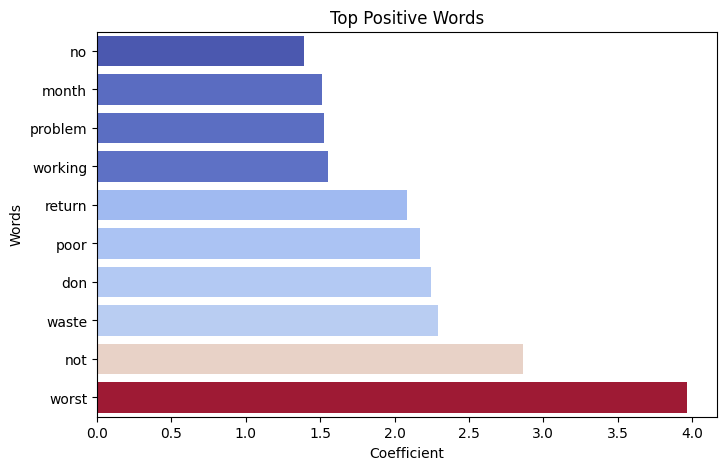

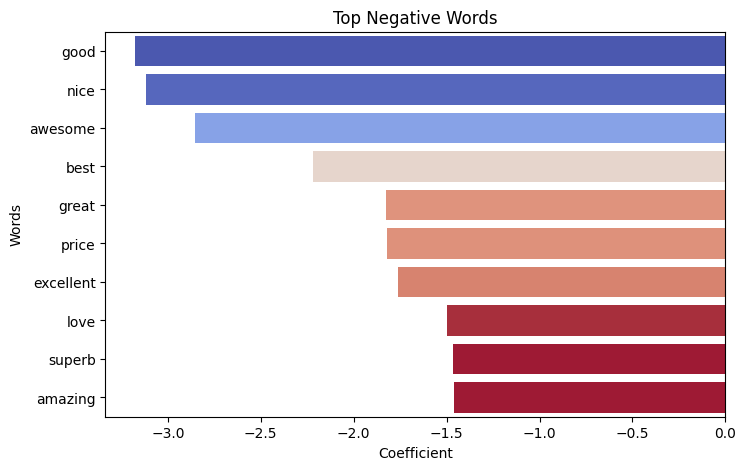

In [16]:
# Get feature names and coefficients
feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]  # For logistic regression with one target class

# Get top positive and negative words
top_positive_idx = np.argsort(coefficients)[-10:]
top_negative_idx = np.argsort(coefficients)[:10]

top_words = {
    'Top Positive': [(feature_names[i], coefficients[i]) for i in top_positive_idx],
    'Top Negative': [(feature_names[i], coefficients[i]) for i in top_negative_idx]
}

# Display feature importance
for label, words in top_words.items():
    words, weights = zip(*words)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(weights), y=list(words), hue=list(weights), palette='coolwarm', dodge=False, legend=False)
    plt.title(f'{label} Words')
    plt.xlabel('Coefficient')
    plt.ylabel('Words')
    plt.show()

# Upvotes vs. Downvotes
Visualize upvotes and downvotes distribution:

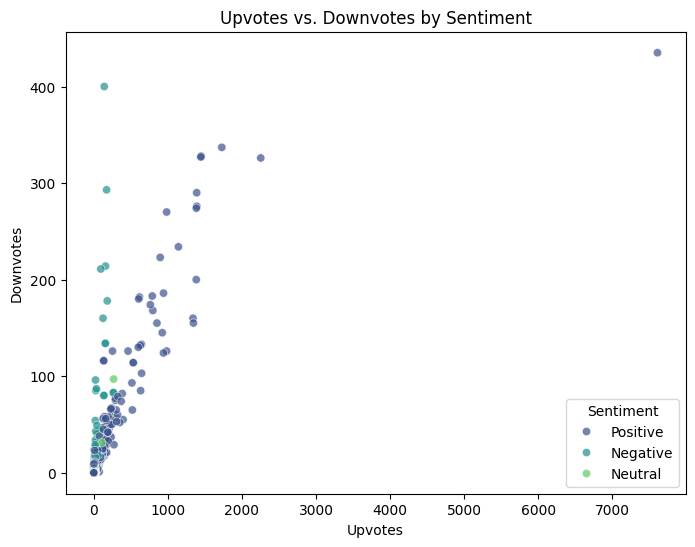

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='upvotes', y='downvotes', hue='Sentiment', palette='viridis', alpha=0.7)
plt.title('Upvotes vs. Downvotes by Sentiment')
plt.xlabel('Upvotes')
plt.ylabel('Downvotes')
plt.show()

In [18]:
pivot_table = df.pivot_table(index='product_id', columns='location', values='rating')

In [19]:
pivot_table.fillna(0, inplace=True)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(pivot_table)

In [21]:
import pickle
pickle.dump(model, open("sentiment_model.pkl", "wb"))
pickle.dump(similarity_matrix, open("recommendation_model.pkl", "wb"))

# Test with a custom review

In [22]:
new_review = ["The product is excellent and met all my expectations and everything is good!"]
new_review_tfidf = tfidf.transform(new_review)
predicted_sentiment = model.predict(new_review_tfidf)
print("Predicted Sentiment:", predicted_sentiment[0])

Predicted Sentiment: Positive


In [23]:
new_review = ["The product is not good"]
new_review_tfidf = tfidf.transform(new_review)
predicted_sentiment = model.predict(new_review_tfidf)
print("Predicted Sentiment:", predicted_sentiment[0])

Predicted Sentiment: Negative
